num reads: 17350
lengths reads: 100
k=10: num nodes=47596, num edges=1596200
In Degrees:
degree with max count: 1 count: 12828
Out Degrees:
degree with max count: 1 count: 12906


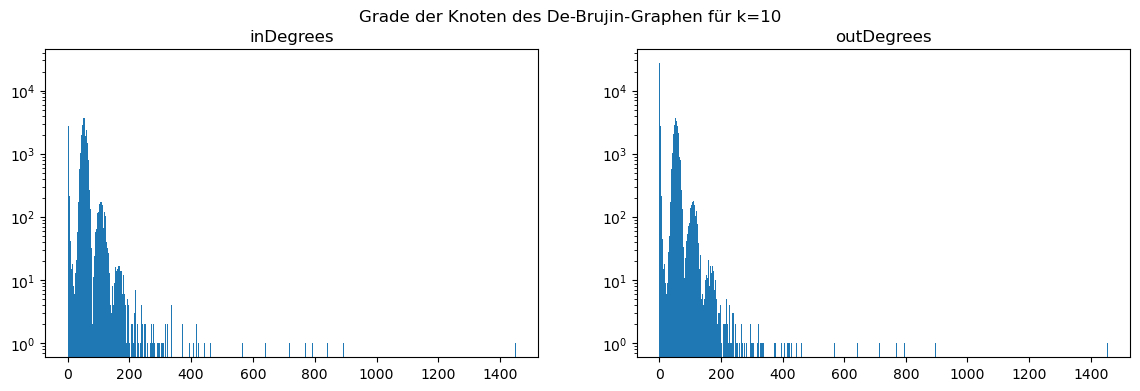

k=20: num nodes=54786, num edges=1422700
In Degrees:
degree with max count: 1 count: 18825
Out Degrees:
degree with max count: 1 count: 18832


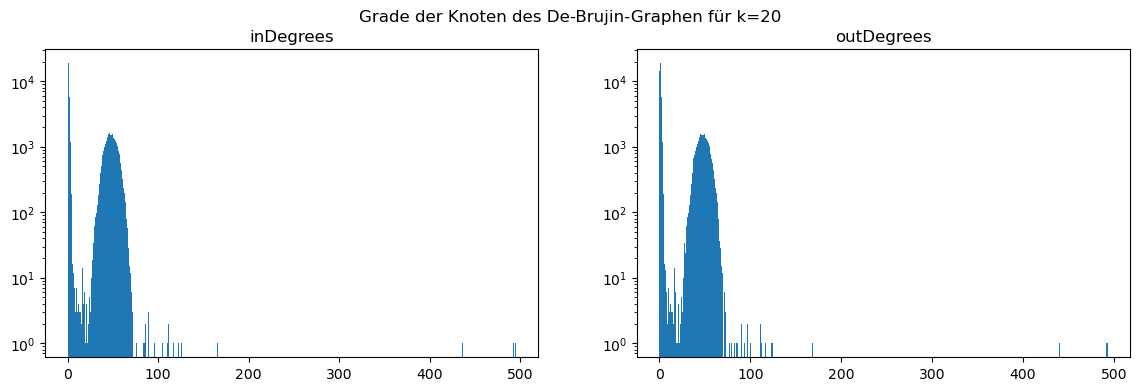

k=30: num nodes=54830, num edges=1249200
In Degrees:
degree with max count: 1 count: 18860
Out Degrees:
degree with max count: 1 count: 18860


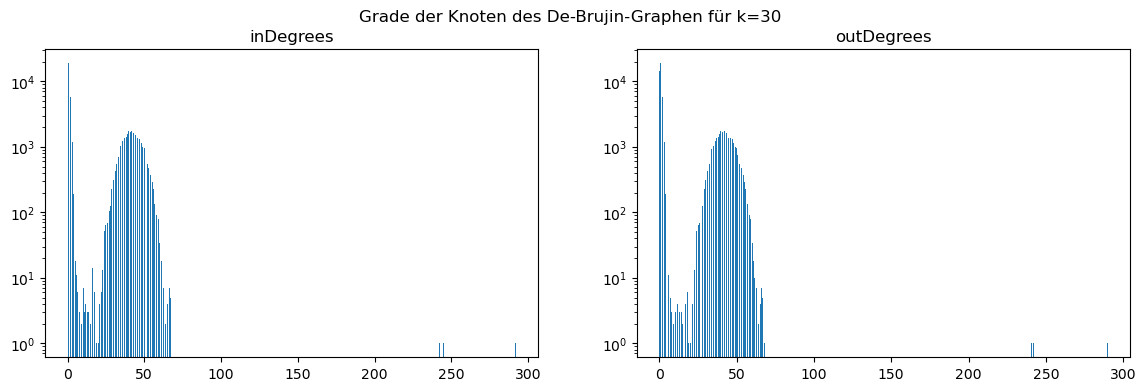

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from src.deBrujinGraphAssembly import DeBrujinGraph
from src.utils import *

fpath = 'reads.fa'

reads = readSequences(fpath)
print(f'num reads: {len(reads)}')
print(f'lengths reads: {len(reads[0])}')

for k in [10,20,30]:
    deBrujinGraph = DeBrujinGraph(reads, k)
    graph = deBrujinGraph.graph
    numNodes = len(graph)
    numEdges = sum([sum(graph[node].values()) for node in graph])
    print(f'k={k}: num nodes={numNodes}, num edges={numEdges}')

    degrees = deBrujinGraph.getDegreesNodes()
    degsList = np.array([degrees[node] for node in degrees])

    print('In Degrees:')
    vals, counts = np.unique(degsList[:,0], return_counts=True)
    print(f'degree with max count: {vals[np.argmax(counts)]} count: {max(counts)}')

    print('Out Degrees:')
    vals, counts = np.unique(degsList[:,1], return_counts=True)
    print(f'degree with max count: {vals[np.argmax(counts)]} count: {max(counts)}')

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14,4)
    fig.suptitle(f'Grade der Knoten des De-Brujin-Graphen für k={k}')    

    ax1.set_title('inDegrees')
    ax1.set_yscale('log')
    ax1.hist(degsList[:,0], bins=500)

    ax2.set_title('outDegrees')
    ax2.set_yscale('log')
    ax2.hist(degsList[:,1], bins=500)

    plt.savefig(f'Plots/hist_nodeDeg_graph_k{k}.png')
    plt.show()

In [ ]:
# find euler path


In [20]:
from collections import defaultdict
deg = defaultdict(lambda: [0,0])
deg['A'] = [3,5]
deg['B'][0] += 1
deg['B'][1] += 1
deg

defaultdict(<function __main__.<lambda>()>, {'A': [3, 5], 'B': [1, 1]})